<h1 align='center'><b>Machine Learning Algorithms for Classification</b></h1>
<p align='center'><img src=https://estatsite.com.br/wp-content/uploads/2021/06/programming-code-coding-or-hacker-background-programming-code-icon-made-with-binary-code-digital-binary-data-and-streaming-digital-code-vector-1200x675.jpg heigth='350' width='600'></p>

<p align='justify'>Nós faremos uso de 2 (dois) dos primeiros algoritmos de aprendizado de máquina descritos por algoritmos para classificação: o perceptron e os neurônios lineares adaptativos. Vamos implementar um perceptron passo a passo em Python e treiná-lo para classificar diferentes espécies de flores no conjunto de dados Iris, muito famoso por sinal. Isso nos ajudará a entender o conceito de algoritmos de aprendizado de máquina para classificação e como eles podem ser implementados com eficiência em Python.</p>


<h2>Aplicações</h2>

In [8]:
# Padronizando as bibliotecas usadas e as versões
%watermark -a "Willian Pina" -u -d -p numpy,pandas,matplotlib

Author: Willian Pina

Last updated: 2022-04-10

numpy     : 1.21.5
pandas    : 1.2.5
matplotlib: 3.5.1



In [9]:
# Implementando um perceptron em Python
import numpy as np


class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

<p align='justify'>Usando esta implementação do <i>Perceptron</i>, agora podemos inicializar novos Perceptron objetos com uma determinada taxa de aprendizado, <i>eta</i>, e o número de <i>epoch</i>, <i>n_iter</i> (passa sobre o conjunto de dados de treinamento).</p>

<h4>Treinando um modelo <i>Perceptron</i> no conjunto de dados Iris</h4>
<p align='justify'>Consideraremos apenas duas classes de flores, Setosa e Versicolor, do conjunto de dados Iris por razões práticas, lembrando que o <i>perceptron</i> é um classificador binário. No entanto, o algoritmo <i>perceptron</i> pode ser estendido para classificação multiclasse — por exemplo, a técnica One vs All (OvA) - Um contra Todos.</p>

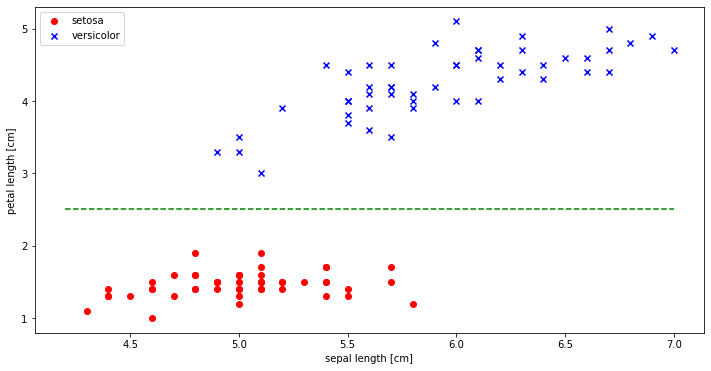

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregando os dados
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None, encoding='utf-8')

# Selecionando setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extraindo sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# Plotando os dados
plt.figure(figsize=(12,6))
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.hlines(y= 2.5, xmin=4.2, xmax=7, colors='g', linestyles='--')
plt.legend(loc='upper left')

plt.show()

<p align='justify'>O gráfico de dispersão anterior mostra a distribuição de exemplos de flores no conjunto de dados Iris ao longo dos dois eixos de recursos: comprimento da pétala e comprimento da sépala (medido em centímetros). Neste subespaço de características bidimensionais, podemos ver que há um limite de decisão linear que deve ser suficiente para separar as flores Setosa das flores Versicolor. Assim, um classificador linear como o perceptron deve ser capaz de classificar perfeitamente as flores neste conjunto de dados.</p>

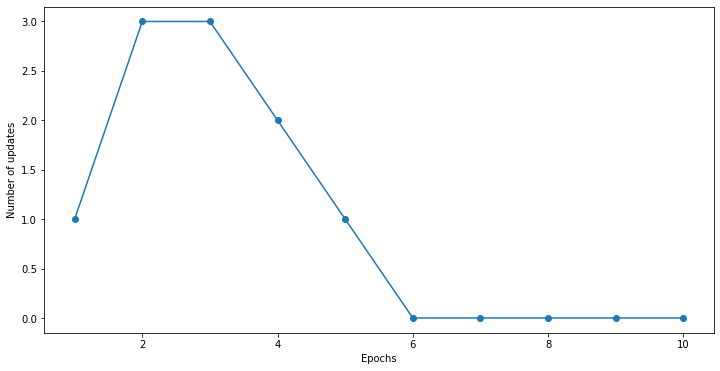

In [18]:
# Treinando o modelo Perceptron

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.figure(figsize=(12,6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [32]:
# Plotando as Regiões de Decisão (Função)
from matplotlib.colors import ListedColormap

# Definindo a Função
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

C:\Users\willi\AppData\Local\Temp\ipykernel_7904\3134332590.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


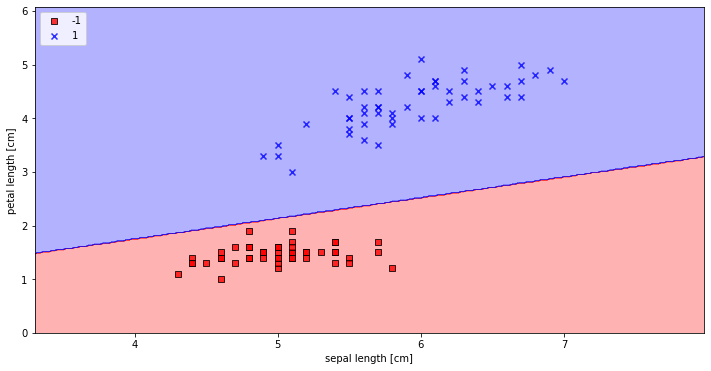

In [37]:
# Plotando os resultados
plt.figure(figsize=(12,6))
plot_decision_regions(X, y, classifier=ppn)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

<p align='justify'>Como podemos ver no gráfico, o perceptron aprendeu um limite de decisão que é capaz de classificar perfeitamente todos os exemplos de flores no subconjunto de treinamento Iris.</p>
<p align='justify'>O pesquisador <i><b>Sebastian Raschka</b></i> chama a atenção no seguinte aspecto, embora o perceptron classifique perfeitamente as duas classes de flores Iris, a convergência é um dos maiores problemas do perceptron. <i>Rosenblatt</i> provou matematicamente que a regra de aprendizagem perceptron converge se as duas classes podem ser separadas por um hiperplano linear. No entanto, se as classes não puderem ser separadas perfeitamente por tal limite de decisão linear, os pesos nunca pararão de atualizar, a menos que definamos um número máximo de épocas.</p>

<h4>Neurônios lineares adaptativos e a convergência da aprendizagem (<i>Adaline</i>)</h4>
<p align='justify'>O algoritmo <i>Adaline</i> é particularmente interessante porque ilustra os principais conceitos de definição e minimização das funções de custo contínuo. Isso estabelece as bases para a compreensão de algoritmos de aprendizado de máquina mais avançados para classificação, como regressão logística, máquinas de vetor de suporte (SVM) e modelos de regressão.</p>

In [39]:
# Implementando o Adaline
class AdalineGD(object):
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
  
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

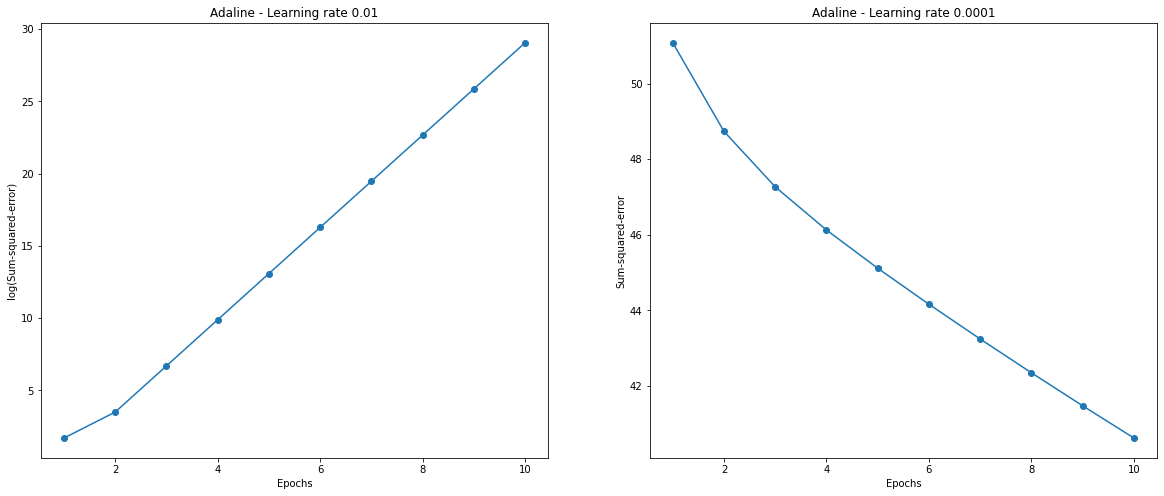

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# eta = taxa de aprendizado (learning rate)
#Treinando um modelo com tx 0.01
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

#Treinando um modelo com tx 0.00001
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')


plt.show()

<p align='justify'>Como podemos ver nos gráficos de função de custo resultantes, encontramos dois tipos diferentes de problemas. O gráfico à esquerda mostra o que pode acontecer se escolhermos uma taxa de aprendizado muito grande. Em vez de minimizar a função de custo, o erro se torna maior a cada época, porque ultrapassamos o mínimo global. Por outro lado, podemos ver que o custo diminui no gráfico à direita, mas a taxa de aprendizado escolhida, 𝜂𝜂 = 0,0001 , é tão pequena que o algoritmo exigiria um número muito grande de épocas para convergir para o custo mínimo global.</p>

<h4>Melhorando o <i>Gradient Descent</i> por meio do dimensionamento de recursos</h4>
<p align='justify'>O <i>Gradient Descent</i> é um dos muitos algoritmos que se beneficiam do dimensionamento de recursos. Usaremos um método de dimensionamento de recursos chamado padronização (<i>Standardization</i>), que fornece aos nossos dados as propriedades de uma distribuição normal padrão: média zero e variância unitária. Esse procedimento de normalização ajuda o aprendizado do <i>Gradient Descent</i> a convergir mais rápido; no entanto, ele não torna o conjunto de dados original normalmente distribuído. A padronização desloca a média de cada recurso para que seja centralizado em zero e cada recurso tenha um desvio padrão de 1 (variância unitária).</p>

<p align='justify'>Uma das razões pelas quais a padronização ajuda no aprendizado do <i>Gradient Descent</i> é que o otimizador precisa passar por menos etapas para encontrar uma solução boa ou ótima (o custo mínimo global).</p>


C:\Users\willi\AppData\Local\Temp\ipykernel_7904\3134332590.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


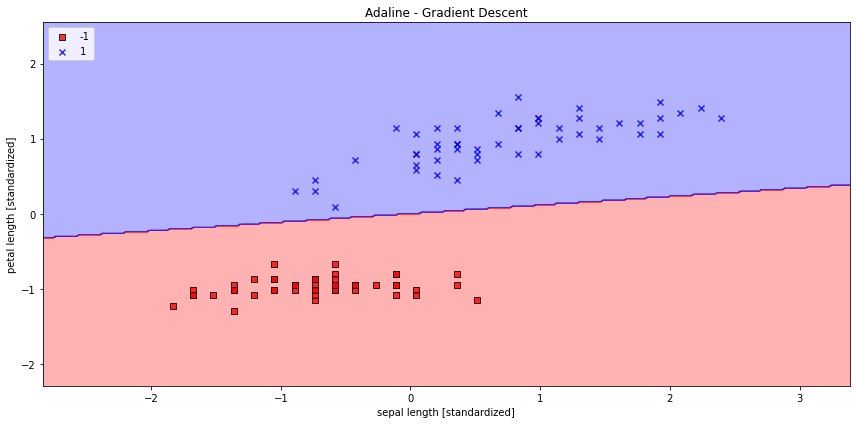

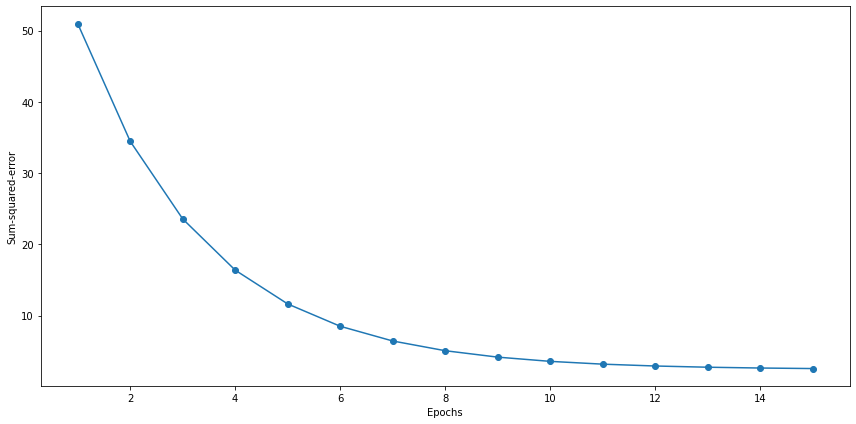

In [47]:
# Padronizando as Features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# Treinando o modelo
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y) # Aplicando as Features já padronizadas (Standard)

plt.figure(figsize=(12,6))
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

plt.figure(figsize=(12,6))
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()

plt.show()

<p align='justify'>Como podemos ver nos gráficos, Adaline agora convergiu após o treinamento nos recursos padronizados usando uma taxa de aprendizado de 𝜂𝜂 = 0,01 . No entanto, observe que o SSE permanece diferente de zero, embora todos os exemplos de flores tenham sido classificados corretamente.</p>

<h4>Aprendizado de máquina em larga escala e o <i>Gradient Descent</i> estocástico</h4>
<p align='justify'>Anteriomente, aprendemos como minimizar uma função de custo dando um passo na direção oposta de um gradiente de custo que é calculado a partir de todo o conjunto de dados de treinamento; é por isso que essa abordagem às vezes também é chamada de <i>Gradient Descent</i> em lote. Agora imagine que temos um conjunto de dados muito grande com milhões de dados, o que não é incomum em muitos aplicações de aprendizado de máquina. Executar o <i>Gradient Descent</i> em lote pode ser computacionalmente bastante caro neste cenário, pois precisamos reavaliar todo o conjunto de dados de treinamento toda vez que damos um passo em direção ao mínimo global. Uma alternativa popular para o algoritmo <i>Gradient Descent</i> em lote é o <i>Gradient Descent</i> estocástico (SGD), que às vezes também é chamada de <i>Gradient Descent</i> iterativa ou online. Em vez de atualizar os pesos com base na soma dos erros acumulados em todos os exemplos de treinamento, nós atualizamos os pesos de forma incremental para cada exemplo de treinamento.</p>
<p align='justify'>Embora o SGD possa ser considerado como uma aproximação do <i>Gradient Descent</i>, ele normalmente atinge a convergência muito mais rapidamente devido às atualizações de peso mais frequentes. Como cada gradiente é calculado com base em um único exemplo de treinamento, a superfície de erro é mais ruidosa do que no <i>Gradient Descent</i>, o que também pode ter a vantagem de que o SGD pode escapar de mínimos locais rasos mais facilmente se estivermos trabalhando com funções de custo não lineares.</p>

<p align='justify'>Outra vantagem do SGD é que podemos usá-lo para aprendizado online. No aprendizado online, nosso modelo é treinado dinamicamente à medida que novos dados de treinamento chegam. Isso é especialmente útil se estivermos acumulando grandes quantidades de dados, por exemplo, dados de clientes em aplicativos da web. Usando o aprendizado online, o sistema pode se adaptar imediatamente às mudanças e os dados de treinamento podem ser descartados após a atualização do modelo se o espaço de armazenamento for um problema.</p>


In [48]:
# Criando o Algoritmo
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

C:\Users\willi\AppData\Local\Temp\ipykernel_7904\3134332590.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


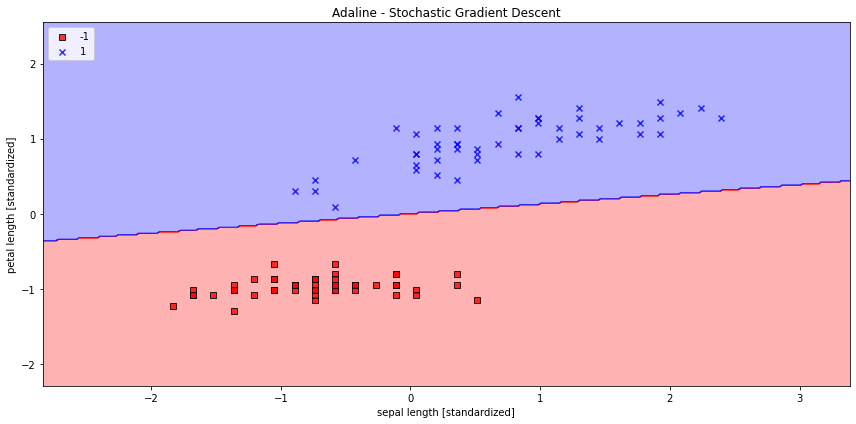

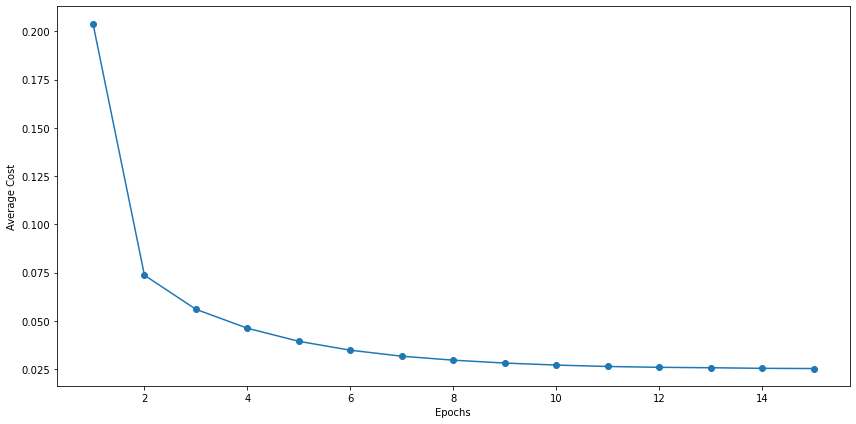

In [49]:
# Instanciando o algoritmo com tx Aprendizagem 0.01
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)

# Treinando o algoritmo AdaSGD
ada_sgd.fit(X_std, y)

# Plotando as regiões de decisão
plt.figure(figsize=(12,6))
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

plt.figure(figsize=(12,6))
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()

plt.show()

<p align='justify'>Como você pode ver, o custo médio cai muito rapidamente e o limite de decisão final após 15 épocas parece semelhante ao <i>Gradient Descent</i> de lote <i>Adaline</i>.</p>